<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# 사용할 데이터셋 다운로드 하기
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing") # 디렉토리 설정하기 - /기본 경로/datasets/housing
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" # 다운로드 할 파일의 URL

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # 디렉토리 만들기
  tgz_path = os.path.join(housing_path, "housing.tgz") # 파일의 경로
  urllib.request.urlretrieve(housing_url, tgz_path) # URL로 지정한 파일을 다운로드
  housing_tgz = tarfile.open(tgz_path) # 다운 받은 파일 열기
  housing_tgz.extractall(path= housing_path) # 압축 파일(housing.tgz) 압축 풀기
  housing_tgz.close() # 파일 닫기

fetch_housing_data()

In [63]:
# 다운 받은 데이터셋(csv) 파일을 pandas 데이터 프레임으로 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH, filename="housing.csv"):
  csv_path = os.path.join(housing_path, filename) # os.path.join("/datasets/housing", "housing.csv") -> /datasets/housing/housing.csv
  return pd.read_csv(csv_path) # 데이터 프레임 리턴

# 데이터 세트 확인

In [64]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## housing 데이터 알아보기
각 컬럼의 의미를 살펴보기

* longitude : 경도
* latitude : 위도
* housing_median_age : 중간 주택 연도
* total_rooms : 방의 총 개수
* total_bedrooms : 침실의 총 개수
* population : 인구
* households : 가구
* median_income : 중간 소득
* median_house_value : 중간 주택 가격
* ocean_proximity : 바다와의 거리

# 데이터의 기본 정보 확인

In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
# 결측치 확인 -> 머신러닝 모델은 결측치가 들어갈 수 없으므로 결측치를 확인하고 제거 및 채워야 함.
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## 데이터프레임의 통계적 특징 확인
- `describe()` 메소드를 이용해 통계적 트

In [67]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 데이터의 형태를 빠르게 검토 - 시각화

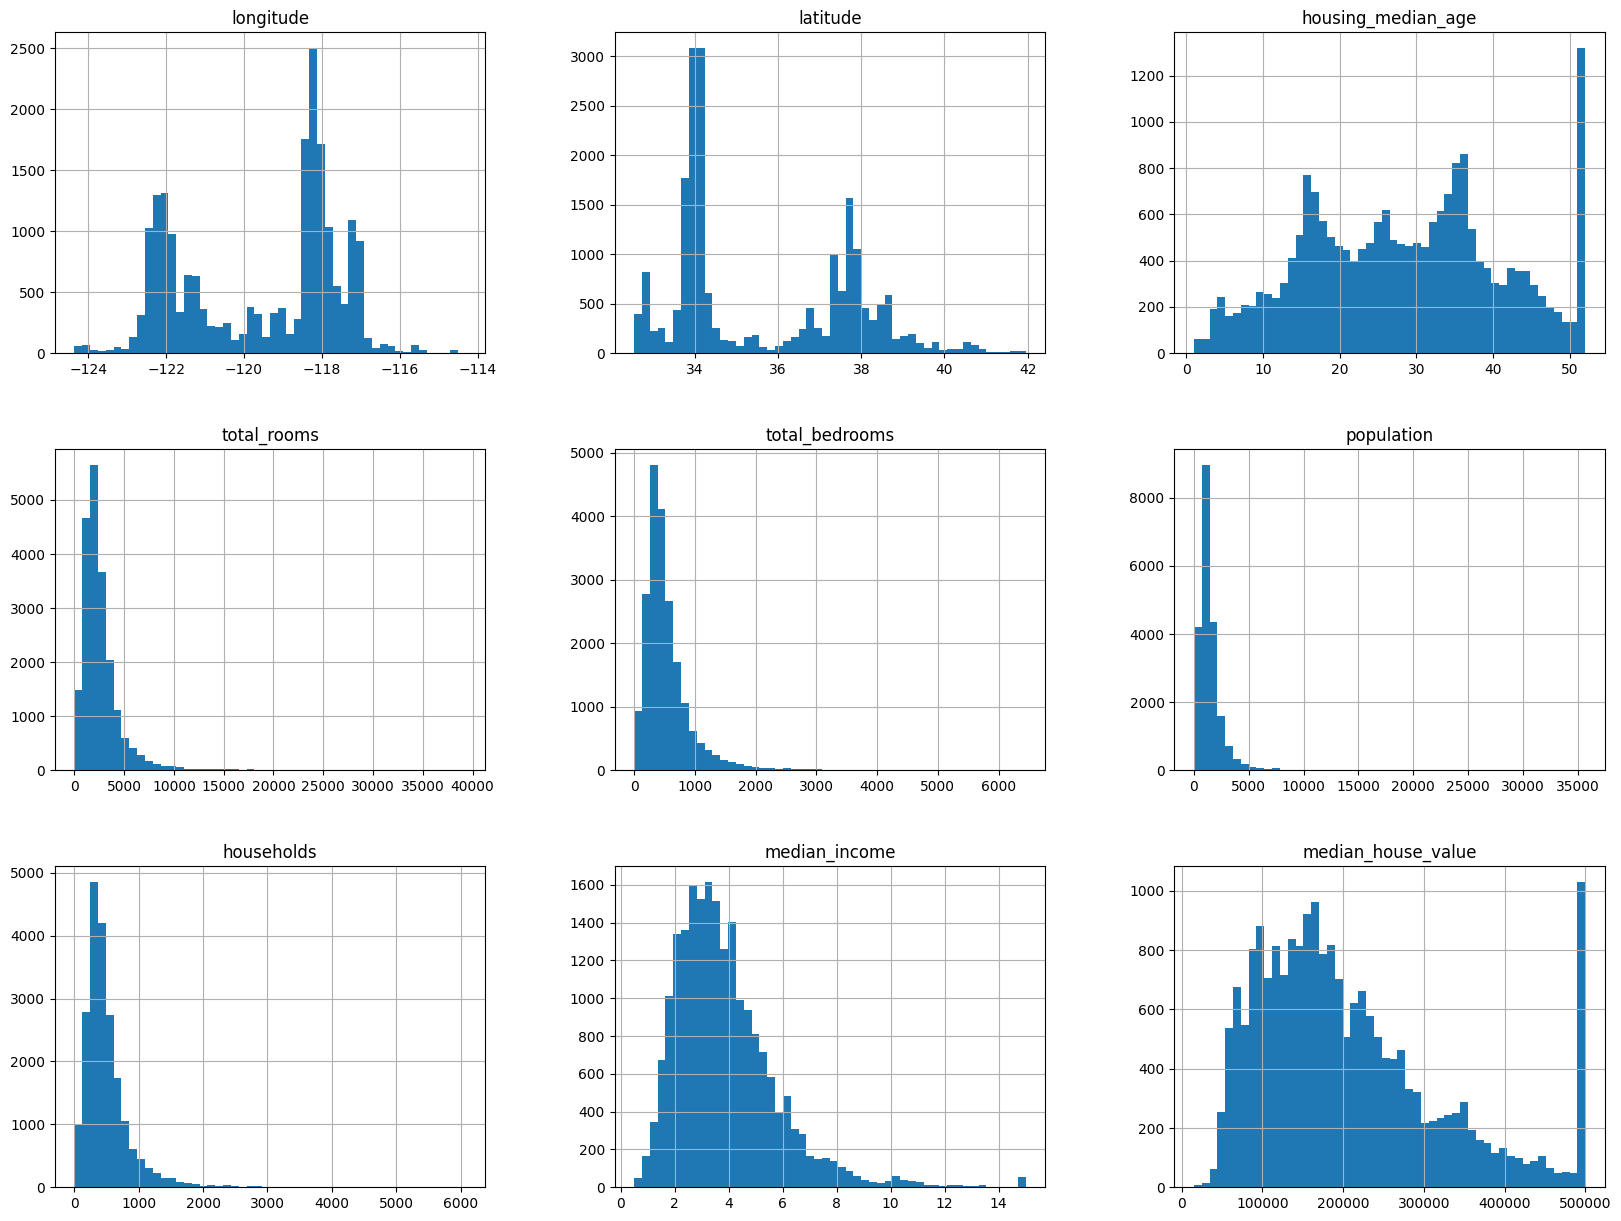

In [68]:
import matplotlib.pyplot as plt

housing.hist(
    bins = 50,
    figsize=(20,15)
)

plt.show()

# 테스트 세트 만들기

In [69]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    housing,
    test_size =0.2,
    random_state=42
)

<Axes: >

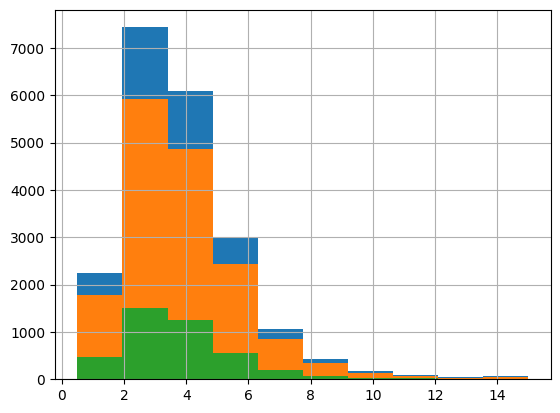

In [70]:
housing['median_income'].hist()
train_set['median_income'].hist()
test_set['median_income'].hist()

In [71]:
# income_cat : 소득 구간 -> Feature를 나누기 위해 새롭게 생성
import numpy as np
housing['income_cat'] = pd.cut(
    housing['median_income'], # 구간 분할 대상 데이터(연속형 데이터)
    bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels = [1, 2, 3, 4, 5]

    )

housing[['median_income','income_cat']].head()

,median_income,income_cat
0,8.3252,5
1,8.3014,5
2,7.2574,5
3,5.6431,4
4,3.8462,3


<Axes: >

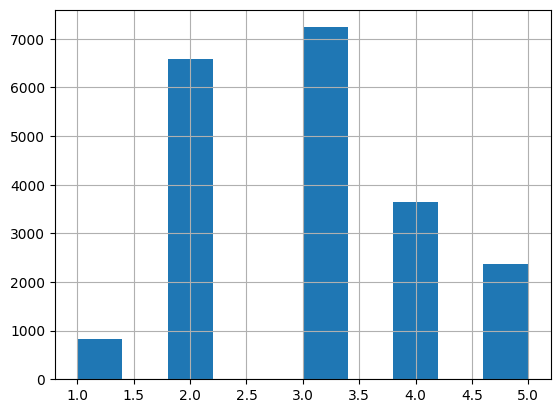

In [72]:
housing['income_cat'].hist()

In [73]:
train_set, test_set = train_test_split(
    housing,
    test_size = 0.2,
    random_state = 42,
    stratify=housing['income_cat']
)

<Axes: >

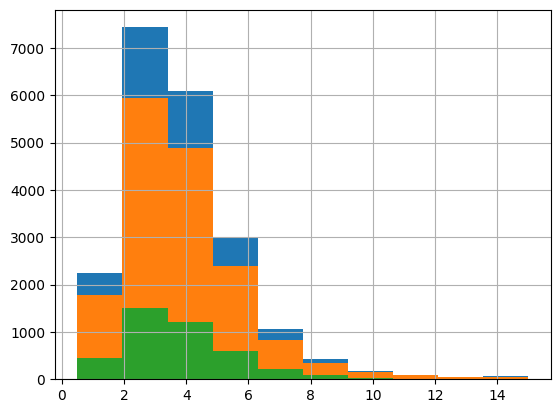

In [74]:
housing['median_income'].hist()
train_set['median_income'].hist()
test_set['median_income'].hist()

In [75]:
# 랜덤하게 잘랐을 때와, 계층 분할을 이용 했을 때의 차이
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# 1. 랜덤 분할
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42
)

# 2. 계층 분할
train_set_strat, test_set_strat = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing['income_cat']
)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(test_set_strat),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()

compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [76]:
train_set, test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing['income_cat']
)

# EDA

In [77]:
housing = train_set.copy()

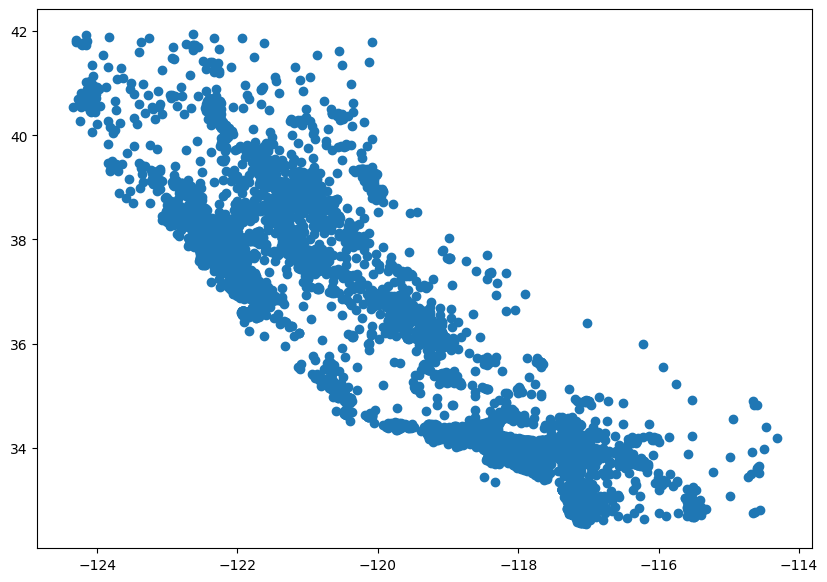

In [78]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x=housing['longitude'], # 세로로 그어지는 줄 -> 경도
    y=housing['latitude'] # 가로로 그어지는 줄 ->
)

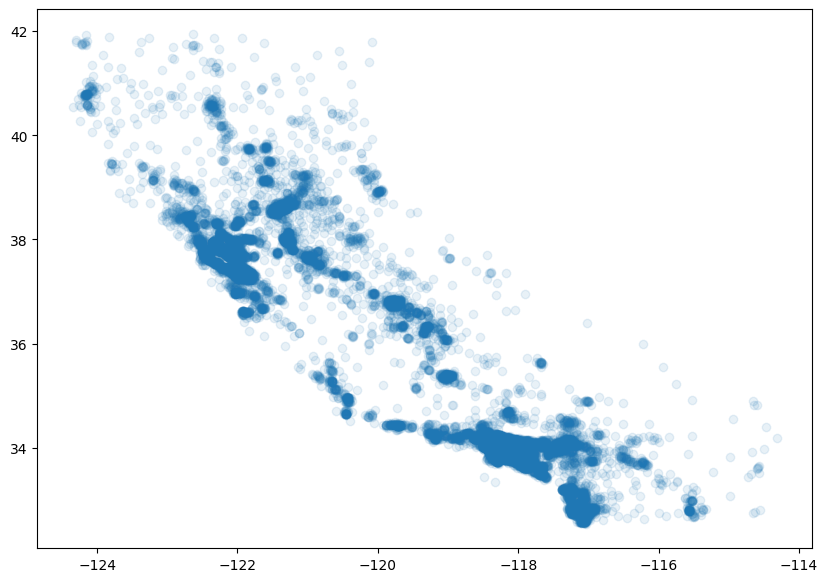

In [79]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha=0.1
)

plt.show()

인구 수, 집 가격을 포함해서 시각화

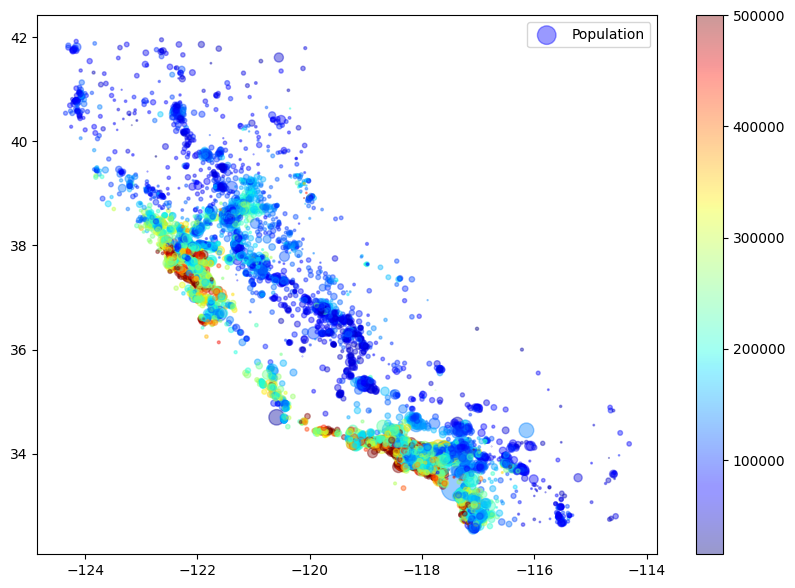

In [80]:
plt.figure(figsize=(10, 7))

plt.scatter(
    x=housing['longitude'],
    y=housing['latitude'],
    alpha=0.4,
    s=housing['population']/100, # 인구 수가 많으면 많을 수록 점이 커짐
    label="Population",
    c=housing['median_house_value'], # 집 가격에 따라 색이 변화될 수 있도록 설정
    cmap=plt.get_cmap('jet') # 컬러 테마
)

plt.legend()
plt.colorbar()
plt.show()

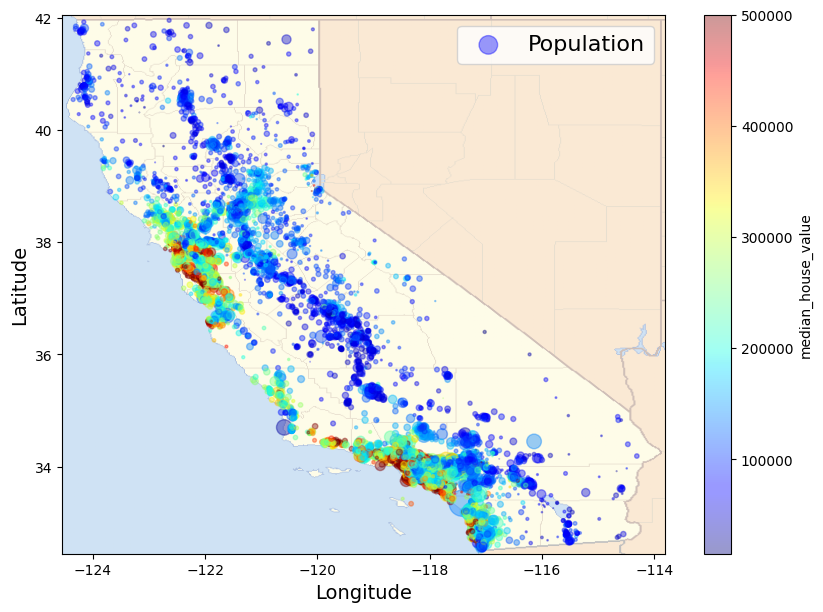

In [81]:
# Download the California image
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,

                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

- 무작정 해안가라고 해서 집값이 비싸진 않다.
  - 북쪽에는 인구도 많이 없고 집도 싸요
  - 내륙쪽에도 비싼집이 몰려있는 구간이 종종 있다.

# 상관관계 조사하기 ( SCC - Standard Correlation Coefficient )
- 표준 상관계수 조사
- 피어슨 상관계수 ( 피어슨의 $r$)
- 데이터끼리 얼마나 영향을 미치나에 대한 수치
  - $x$가 증가 하면 $y$는 어떻게 증가/감소 하는가?
- -1 ~ 1로 표현

In [82]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
income_cat            0.642256
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### 데이터와 데이터의 관계

#### 1. 분산 ( variance )
- 데이터에 대한 이산정도를 나타낸다.
  - 이산 정도 : 데이터의 펼쳐짐 정도
- 편차 제곱의 평균

$$
\sigma^{2} = \frac{1}{n}\sum_{i=1}^n{(x_i-\bar{x})^2}\\(\bar{x}:평균)
$$


In [83]:
import numpy as np

data1 = np.array([80, 85, 90, 95, 100])
data2 = np.array([50, 70, 90, 110, 130])

data1.mean(), data2.mean()

(90.0, 90.0)

In [84]:
# 분산
data1.var(), data2.var()

(50.0, 800.0)

표준편차
$$
\sigma = \sqrt{\sigma^{2}}
$$
통계적으로 이야기 할 때는 표준편차를 더 많이 쓴다

In [85]:
data1.std(), data2.std()

(7.0710678118654755, 28.284271247461902)

#### 4. 공분산 ( covariance )
- 두 데이터 집단간의 상관정도를 나타낸다.
- 평균 편차곱
- **방향성**은 보여줄 수 있으나, 강도(세기)를 나타내는데는 한계가 있다.
  - 표본 데이터의 크기에 따라서 값의 차이가 큰 단점이 있다.

$$ \text{cov} = \frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}\\ (\bar{x}:x의 평균, \bar{y}:y의 평균) $$

In [86]:
def covariance(data1, data2):
  x_ = np.mean(data1) # data1의 평균
  y_ = np.mean(data2) # data2의 평균

  return np.sum((data1 - x_) * (data2 - y_)) / len(data1) - 1


In [87]:
data1 = np.array([80, 90, 100, 90, 80])
data2 = np.array([70, 80, 90, 80, 70])

covariance(data1, data2) # 진행 방향이 같기 때문에 양수(+)가 나온다.

55.0

In [88]:
data3 = [80, 85, 90, 85, 80]
data4 = [90, 85, 80, 85, 90]

covariance(data3, data4) # 진행 방향이 반대이기 때문에 음수(-)가 나온다. -> 공분산에서는 부호가 중요.

-15.0

In [89]:
data5 = [800, 850, 900, 850, 800]
data6 = [900, 850, 800, 850, 900]

covariance(data5, data6) # 데이터의 스케일(크기)이 달라지면 공분산의 스케일도 커짐.

-1401.0

#### 상관 계수
- 공분산의 한계를 극복하기 위해서 만들어짐
  - 공분산은 데이터의 방향성만 판단이 가능
- `-1 ~ 1` 까지의 실수를 가지며, 0과 가까울수록 상관도가 적다는 것을 의미

$$
 \text{correlation-coefficient} = \frac{공분산}{\sqrt{{x분산} \cdot {y분산}}}
$$

$$
r = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sqrt{{\sum(x-\bar{x})^2}\cdot{\sum(y-\bar{y})^2}}}
$$

In [90]:
# 상관계수 구현하기
def corrcoef(data1, data2):
  x_ = np.mean(data1)
  y_ = np.mean(data2)

  # 분모( x의 분산 * y의 분산)
  x_y_var = np.sum((data1 - x_) ** 2) * np.sum((data2 - y_)**2)
  # 분자( 공분산 )
  x_y_cov = np.sum( (data1-x_)*(data2-y_))

  return x_y_cov / np.sqrt(x_y_var)

In [91]:
# data1과 data2 모두 증가할 때 증가하고, 감소할 때 감소
# 두 데이터 모두 양의 방향, 위쪽 방향으로 증가하고 있음 -> 즉, 같은 방향으로 증가하고 있음 -> 양의 상관관계
data1 = np.array([80, 85, 100, 90, 95])
data2 = np.array([70, 75, 85, 80, 83])

corrcoef(data1, data2)

0.9837827088491458

In [92]:
data3 = np.array([10, 20, 30, 40, 50]) # 일정하게 증가함
data4 = np.array([6, 5, 6, 5, 7]) # 일직선, 거의 수평으로 이루어짐

# 두 데이터의 방향이 완전 같지는 않으므로 큰 값이 나오지 않음.
corrcoef(data3, data4)

0.37796447300922725

In [93]:
data5 = np.array([80, 85, 100, 90, 95]) # 일정하게 증가하다가 감소함
data6 = np.array([100, 90, 70, 90, 80]) # 감소하고 증가하다가 감소함

# 두 데이터의 방향이 완벽하게 반대임 -> 음의 상관관계
corrcoef(data5, data6)

-0.970725343394151

In [94]:
data5 = np.array([800, 850, 1000, 900, 950])
data6 = np.array([1000, 900, 700, 900, 800])

corrcoef(data5, data6)

-0.970725343394151

피어슨 상관계수 $r$
- $0 \leq |r| \ \leq 1$
  - $0 \leq |r| \ \leq 0.3$ : 약한 상관 관계
  - $0.3 \leq |r| \ \leq 0.7$ : 보통의 상관 관계
  - $0.7 \leq |r| \ \leq 1$ : 강한 상관 관계

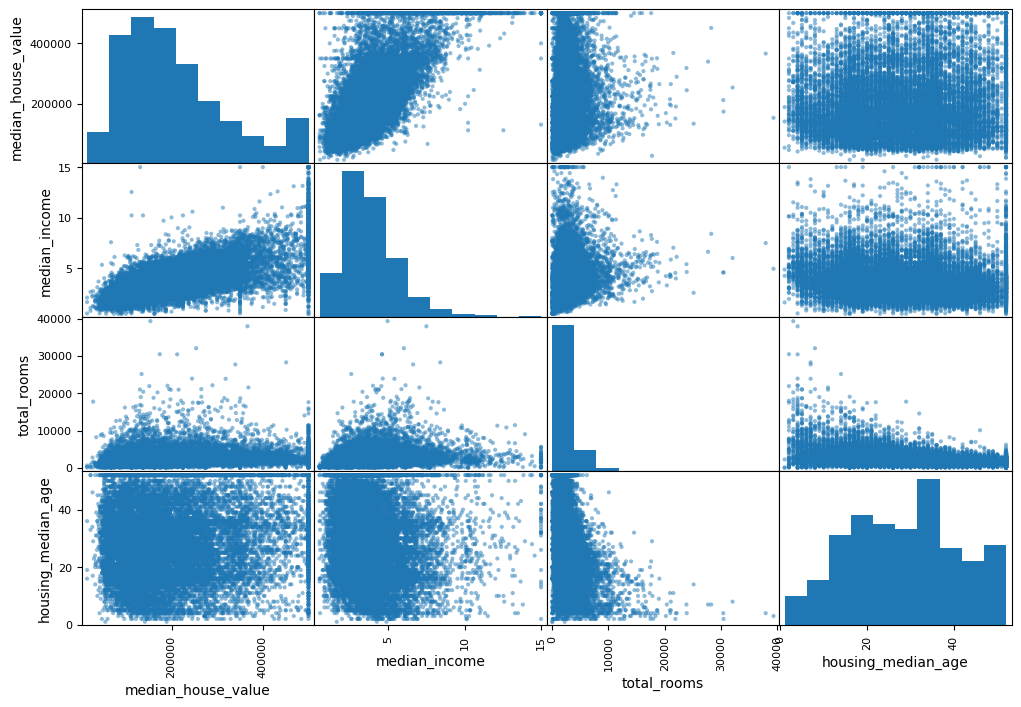

In [95]:
from pandas.plotting import scatter_matrix

feature_names = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[feature_names], figsize=(12, 8))
plt.show()

## 특성 조합
- 두 개 이상의 특성을 조합해서 새로운 특성 생성
- 비율 구하기
- 관계 설정(곱셈)
- 다항식 등등..

In [96]:
# rooms_per_household : 가구 당 방의 비율 특성 새롭게 생성
# bedrooms_per_room : 방 당 침실
# population_per_household : 가구 당 인구 수
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [97]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3,6.096552,0.182692,3.167241


새로 만든 비율 데이터들의 상관관계 점수가 생각보다 잘 나옴
> -> 비율 데이터를 생성하는게 의미 있는 데이터일 가능성도 높음

In [98]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
income_cat                  0.642256
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# 머신러닝을 위한 데이터 준비
- 데이터에 대한 각종 전처리를 수행하는 **파이프라인 생성**


In [99]:
# 필요 없는 Feature 제거
housing = housing.drop("income_cat", axis=1)

# Feature, Label 분리
label_name = "median_house_value"

# Label만 꺼내오기
housing_label = housing[label_name].copy()
# Feature
housing = housing.drop(label_name, axis=1)

## 1. NaN값 처리
- 데이터 샘플을 제거(행 삭제)
- 아예 컬럼을 제거
  - 한 컬럼에 NaN값이 너무나 많은 경우
- 특정 값으로 채우기
  - 0, 평균, 중간값 등등..
  - 데이터가 충분하다면 NaN값을 예측하기 위한 모델을 만들어서 예측값으로 채우는 경우도 있다.
- 판다스의 `fillna`, `dropna` -> 파이프라인 구축 불가. 사이킷런 사용해야 함.

In [101]:
# 사이킷런의 SimpleImputer는 누락값을 채우는 클래스
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') #누락값을 중간값으로 채우기

In [102]:
# 머신러닝 데이터 전처리를 수행 할 때
# 연속형 데이터 / 범주형 데이터를 따로 관리

# 연속형 데이터만 모아낼 DataFrame을 새롭게 생성
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16354 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


In [103]:
X = imputer.fit_transform(housing_num) #누락값을 중간값으로 채우기

In [104]:
housing_tr = pd.DataFrame(
    X, #NaN값이 채워진 배열
    columns=housing_num.columns,
    index=housing.index
)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


## 2. 범주형 데이터 처리 (One Hot Encoding)
- `ocean_proximity`는 문자열 데이터이면서, 범주형(Categorical) 데이터
  - OneHotEncoding을 수행

In [105]:
# 범주형 데이터 처리
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [106]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat) #OneHotEncoding이 생성된 cat_encoder에 housing_cat를 넣어 범주화

In [109]:
housing_cat_one_hot_df = pd.DataFrame(
    housing_cat_one_hot.toarray(),
    columns = cat_encoder.categories_,
    index = housing_cat.index # 꼭 원래 index를 가져와야 함.
)

## 3.사용자 정의 Transformer 만들기
- 비즈니스 로직을 위한 특성 공학을 데이터에 적용
  - 사이킷 런에서는 제공하지 않는 데이터 변환이 있다.
    - 방의 비율, 가구 수 대비 인구수의 비율을 구하거나 등등..
    - 우리가 직접 짜야 할 변환 과정
      - 사이킷런에는 없는 작업
      - 우리가 직접 로직을 만들어서 사이킷런에 포함될 수 있도록 설정
---
- 사이킷런의 `BaseEstimator` 클래스 상속
  - 개발한 클래스가 사이킷런 소속에 포함될 수 있도록 해준다.
- 사이킷런의 `TransformerMixin` 클래스 상속
  - `fit_transform()` 자동 구현


***Duck Typing 문법***
- ***메소드의 구현***에 의해서 ***클래스의 정체성이 결정***되는 현상
- `fit()`, `transform()` 메소드를 클래스 내에 정의함에 따라서 사이킷런이 `Transformer`로 인식 한다.

In [110]:
class A:
  def foo(self):
    print("Here is A.foo()")

class B:
  def foo(self):
    print("Here is B.foo()")

class C:
  def goo(self):
    print("Here is C.goo()")

def who_are_you(who):
  who.foo() #foo() 메소드가 있는 것만 출력할 수 있음.

In [111]:
# A, B는 foo()라는 메소드로 인해 하나의 클래스로 묶일 수 있음.
who_are_you(A())
who_are_you(B())

Here is A.foo()
Here is B.foo()


In [112]:
# 사용할 컬럼의 인덱스 확인 -> 컬럼명을 사용 못하기 때문
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [117]:
# 상속 받을 클래스 가져오기
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):

  # population_per_households 특성 조합을 해봤는데, 딱히 효과가 없는 것 같다.
  #  개발자의 선택에 따라서 추가 할지 말지에 대한 설정값 추가
  def __init__(self, add_population_per_households=True):
    self.add_population_per_households = add_population_per_households

  # fit은 transform을 하기위한 데이터 준비과정이 필요하다. 데이터를 입력 받고, transform에서 변환하기 위한 데이터를 준비
  # 아무것도 안하는데 X를 받는 이유 : Transformer의 Duck Typing 문법을 적용하기 위해
  def fit(self, X):
    return self

  # X에 전체 데이터 들어옴. 여기서 3,4,5,6번 데이터를 가지고 와서
  #  비율을 구하는 특성 공학 수행
  def transform(self, X):
    rooms_per_households = X[:, rooms_ix] / X[:, households_ix]
    bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

    if self.add_population_per_households:
      population_per_households = X[:, population_ix] / X[:, households_ix]
      return np.c_[X, rooms_per_households, bedrooms_per_room, population_per_households]
    else:
      return np.c_[X, rooms_per_households, bedrooms_per_room]



In [118]:
housing.drop(['rooms_per_household', 'bedrooms_per_room','population_per_household'], axis=1, inplace=True)
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [119]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [121]:
attr_adder = CombinedAttributeAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs[:3]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 0.20578363026077975,
        3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 0.16071428571428573,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 0.1915945611866502,
        2.223333333333333]], dtype=object)